In [2]:
#importing all necessary libraries
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.applications.inception_v3 import preprocess_input
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.models import Sequential
from glob import glob
import tensorflow_hub as hub
import os
import numpy as np

In [3]:
# defining and declaring the directory
base_dir = '/Users/karthibalasundaram/Downloads/UD SculptureDataset'
print(base_dir)
train_dir = os.path.join(base_dir, 'TRAIN')
validation_dir = os.path.join(base_dir, 'VALIDATION')

/Users/karthibalasundaram/Downloads/UD SculptureDataset


In [28]:
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator
#using image data generator to normalize all the images
train_datagen = ImageDataGenerator(rescale= 1./255, rotation_range=90)
validation = ImageDataGenerator(rescale= 1./255, rotation_range=90)
train_data = train_datagen.flow_from_directory(train_dir,
                                                 target_size = (224,224),
                                                 batch_size = 34,
                                                 class_mode = 'categorical')

val_data = validation.flow_from_directory(validation_dir,
                                                 target_size = (224,224),
                                                 batch_size = 34,
                                                 class_mode = 'categorical')

Found 3615 images belonging to 24 classes.
Found 385 images belonging to 24 classes.


In [5]:
#checking the class and their indices
train_data.class_indices

{'CHRIST THE TEACHER': 0,
 'DANTE': 1,
 'HAIL MARY': 2,
 'HONOR ROLL': 3,
 'JANE AUSTEN': 4,
 'JOHN F. KENNEDY': 5,
 'KAPPA ALPHA PSI': 6,
 'KNIGHT BY BROTHER MEL': 7,
 'LADY OF THE PINES': 8,
 'MARTIN LUTHER KING JR': 9,
 'MARY LOUISA': 10,
 'MARY OF CANA': 11,
 'MARY, SEAT OF WISDOM': 12,
 'MOSES MAIMONIDES': 13,
 'OMEGA POINT': 14,
 'RED CUBE': 15,
 'SERENITY PINES': 16,
 'THE HOLY FAMILY': 17,
 'THOMAS EQUINAS': 18,
 'THRONE BY BROTHER MEL': 19,
 'TRUSTING IN DREAMS': 20,
 'WILLIAM JOSEPH CHAMINADE': 21,
 'WILLIAM SHAKESPEARE': 22,
 'WOLFGANG AMADEUS MOZART': 23}

In [7]:
#defining the pre-trained model and training it
base_model = hub.KerasLayer("https://tfhub.dev/tensorflow/efficientnet/lite4/feature-vector/2",
                                   trainable=False)

model = tf.keras.Sequential([
        base_model,
        tf.keras.layers.Dense(24, activation='softmax')
])
model.build([1,224,224,3])
model.summary()

model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])



history = model.fit(train_data, epochs=5,validation_data=val_data)

2021-11-23 11:18:15.869788: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2021-11-23 11:18:18.132270: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (1, 1280)                 11837936  
_________________________________________________________________
dense (Dense)                (1, 24)                   30744     
Total params: 11,868,680
Trainable params: 30,744
Non-trainable params: 11,837,936
_________________________________________________________________
Epoch 1/5
107/107 [==============================] - 992s 9s/step - loss: 0.9426 - accuracy: 0.7859 - val_loss: 1.6775 - val_accuracy: 0.7948
Epoch 2/5
107/107 [==============================] - 930s 9s/step - loss: 0.1855 - accuracy: 0.9690 - val_loss: 1.7994 - val_accuracy: 0.8130
Epoch 3/5
107/107 [==============================] - 935s 9s/step - loss: 0.1044 - accuracy: 0.9853 - val_loss: 1.8898 - val_accuracy: 0.8208
Epoch 4/5
107/107 [==============================] - 948s 9s/step - loss: 0

In [9]:
#running the 2nd set of 5 epochs
history = model.fit(train_data, epochs=5,validation_data=val_data)

Epoch 1/5
107/107 [==============================] - 833s 8s/step - loss: 0.0372 - accuracy: 0.9981 - val_loss: 2.1080 - val_accuracy: 0.8208
Epoch 2/5
107/107 [==============================] - 905s 8s/step - loss: 0.0289 - accuracy: 0.9981 - val_loss: 2.1118 - val_accuracy: 0.8208
Epoch 3/5
107/107 [==============================] - 876s 8s/step - loss: 0.0233 - accuracy: 0.9992 - val_loss: 2.1702 - val_accuracy: 0.8234
Epoch 4/5
107/107 [==============================] - 849s 8s/step - loss: 0.0195 - accuracy: 0.9992 - val_loss: 2.2245 - val_accuracy: 0.8208
Epoch 5/5
107/107 [==============================] - 842s 8s/step - loss: 0.0161 - accuracy: 0.9994 - val_loss: 2.2428 - val_accuracy: 0.8234


In [29]:
#running the 3rd set of 5 epochs
history = model.fit(train_data, epochs=5,validation_data=val_data)

Epoch 1/5
107/107 [==============================] - 913s 9s/step - loss: 0.2546 - accuracy: 0.9272 - val_loss: 2.1596 - val_accuracy: 0.8000
Epoch 2/5
107/107 [==============================] - 975s 9s/step - loss: 0.0899 - accuracy: 0.9754 - val_loss: 2.2337 - val_accuracy: 0.8052
Epoch 3/5
107/107 [==============================] - 926s 9s/step - loss: 0.0680 - accuracy: 0.9834 - val_loss: 2.4009 - val_accuracy: 0.8130
Epoch 4/5
107/107 [==============================] - 996s 9s/step - loss: 0.0554 - accuracy: 0.9895 - val_loss: 2.4488 - val_accuracy: 0.8104
Epoch 5/5
107/107 [==============================] - 981s 9s/step - loss: 0.0435 - accuracy: 0.9920 - val_loss: 2.3965 - val_accuracy: 0.8130


In [30]:
#running the 4th set of 5 epochs
history = model.fit(train_data, epochs=5,validation_data=val_data)

Epoch 1/5
107/107 [==============================] - 934s 9s/step - loss: 0.0381 - accuracy: 0.9923 - val_loss: 2.5617 - val_accuracy: 0.8104
Epoch 2/5
107/107 [==============================] - 917s 9s/step - loss: 0.0345 - accuracy: 0.9925 - val_loss: 2.6257 - val_accuracy: 0.8182
Epoch 3/5
107/107 [==============================] - 954s 9s/step - loss: 0.0276 - accuracy: 0.9953 - val_loss: 2.5037 - val_accuracy: 0.8208
Epoch 4/5
107/107 [==============================] - 906s 8s/step - loss: 0.0244 - accuracy: 0.9961 - val_loss: 2.5626 - val_accuracy: 0.8104
Epoch 5/5
107/107 [==============================] - 2794s 26s/step - loss: 0.0270 - accuracy: 0.9950 - val_loss: 2.6271 - val_accuracy: 0.8182


In [66]:
#defining the values of accuracy and loss to be plotted
acc = history.history ['accuracy']
val_acc = history.history ['val_accuracy']
loss = history.history ['loss']
val_loss = history.history ['val_loss']
epochs = range(len(acc))

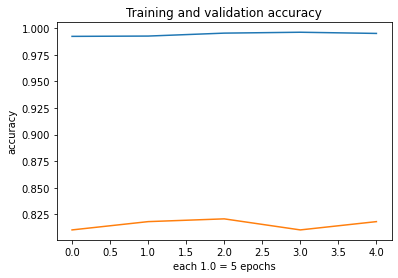

In [82]:
#training and validation accuracy graph
plt.plot ( epochs, acc)
plt.plot ( epochs, val_acc)
plt.xlabel( 'each 1.0 = 5 epochs')
plt.ylabel( 'accuracy')
plt.title('Training and validation accuracy')
plt.show()

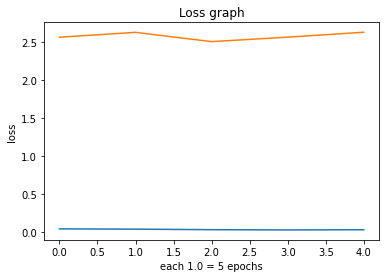

In [83]:
#train and validation loss graph
plt.plot( epochs, loss)
plt.plot( epochs, val_loss)
plt.xlabel( 'each 1.0 = 5 epochs')
plt.ylabel( 'loss')
plt.title('Loss graph')
plt.show()

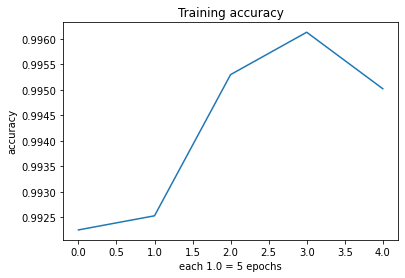

In [85]:
#training accuracy
plt.title('Training accuracy')
plt.xlabel('each 1.0 = 5 epochs')
plt.ylabel('accuracy')
plt.plot ( epochs, acc)

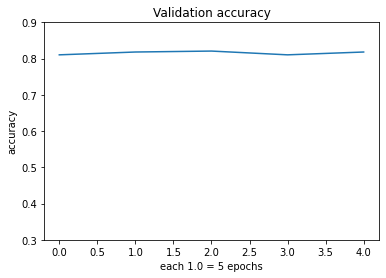

In [103]:
#validation accuracy
plt.title('Validation accuracy')
plt.ylim(0.3,0.9)
plt.xlabel( 'each 1.0 = 5 epochs')
plt.ylabel('accuracy')
plt.plot ( epochs, val_acc)

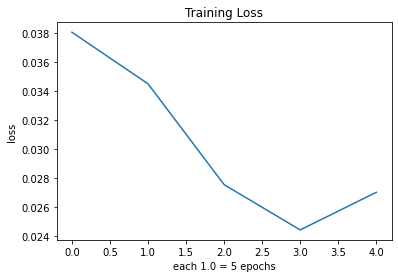

In [98]:
#training loss
plt.plot( epochs, loss)
plt.xlabel( 'each 1.0 = 5 epochs')
plt.ylabel( 'loss')
plt.title('Training Loss')
plt.show()

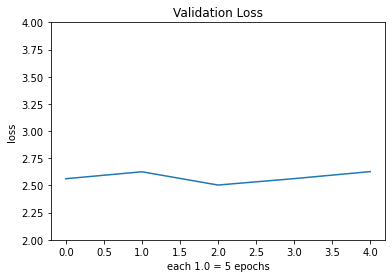

In [92]:
#validation loss
plt.plot( epochs, val_loss)
plt.ylim(2,4)
plt.xlabel( 'each 1.0 = 5 epochs')
plt.ylabel( 'loss')
plt.title('Validation Loss')
plt.show()

In [32]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Saving the tflile model which will then be converted into ONNX model
    with open('sculpture.tflite', 'wb') as f:
  f.write(tflite_model)

INFO:tensorflow:Assets written to: /var/folders/rg/xn4sr_5n2_zff6f04ghb6dnm0000gn/T/tmpuolk_hho/assets


INFO:tensorflow:Assets written to: /var/folders/rg/xn4sr_5n2_zff6f04ghb6dnm0000gn/T/tmpuolk_hho/assets
2021-11-27 16:19:35.480223: I tensorflow/core/grappler/devices.cc:75] Number of eligible GPUs (core count >= 8, compute capability >= 0.0): 0 (Note: TensorFlow was not compiled with CUDA or ROCm support)
2021-11-27 16:19:35.480315: I tensorflow/core/grappler/clusters/single_machine.cc:357] Starting new session
2021-11-27 16:19:35.589554: I tensorflow/core/grappler/optimizers/meta_optimizer.cc:1137] Optimization results for grappler item: graph_to_optimize
  function_optimizer: Graph size after: 1682 nodes (1216), 1706 edges (1238), time = 71.467ms.
  function_optimizer: function_optimizer did nothing. time = 2.661ms.

2021-11-27 16:19:39.614551: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:351] Ignored output_format.
2021-11-27 16:19:39.614600: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:354] Ignored drop_control_dependency.
2021-11-27 16